In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm
from sklearn.ensemble import GradientBoostingRegressor
import copy

In [3]:
train_d=pd.read_csv("../input/train.csv")
test_d=pd.read_csv("../input/test.csv")
sub_d=pd.read_csv("../input/sample_submission.csv")

In [4]:
print("Train- data Shape: {} \nTest data Shape : {}\nSubmission data Shape {} ".format(train_d.shape,test_d.shape,sub_d.shape))

Train- data Shape: (1460, 81) 
Test data Shape : (1459, 80)
Submission data Shape (1459, 2) 


In [5]:
id1=test_d["Id"]

In [6]:

train_d.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_d.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
train_d.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
per=(train_d.isnull().sum()*100/len(train_d)).sort_values(ascending=False)

In [11]:
per.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [12]:
correl=train_d.corr()

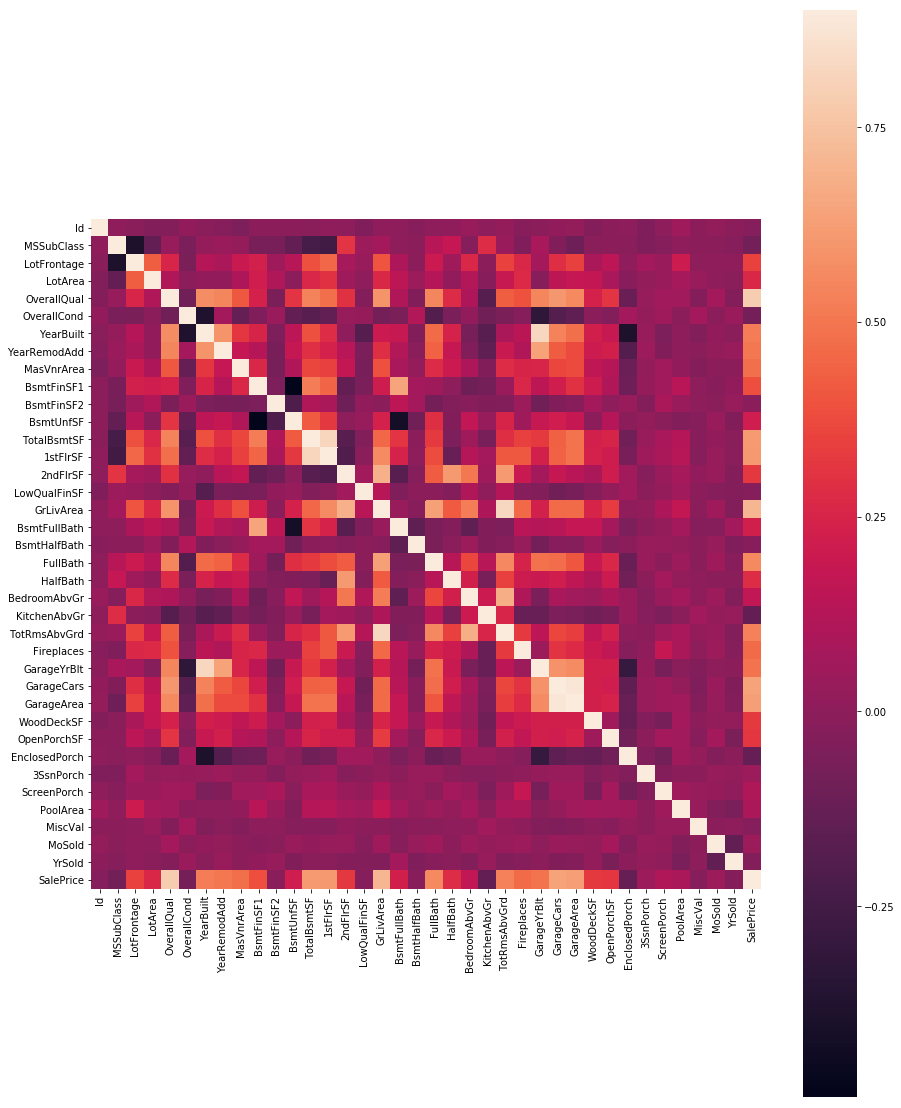

In [13]:
plt.figure(figsize=(15,20))
sns.heatmap(correl,vmax=0.9, square=True)

In [14]:
train_d.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


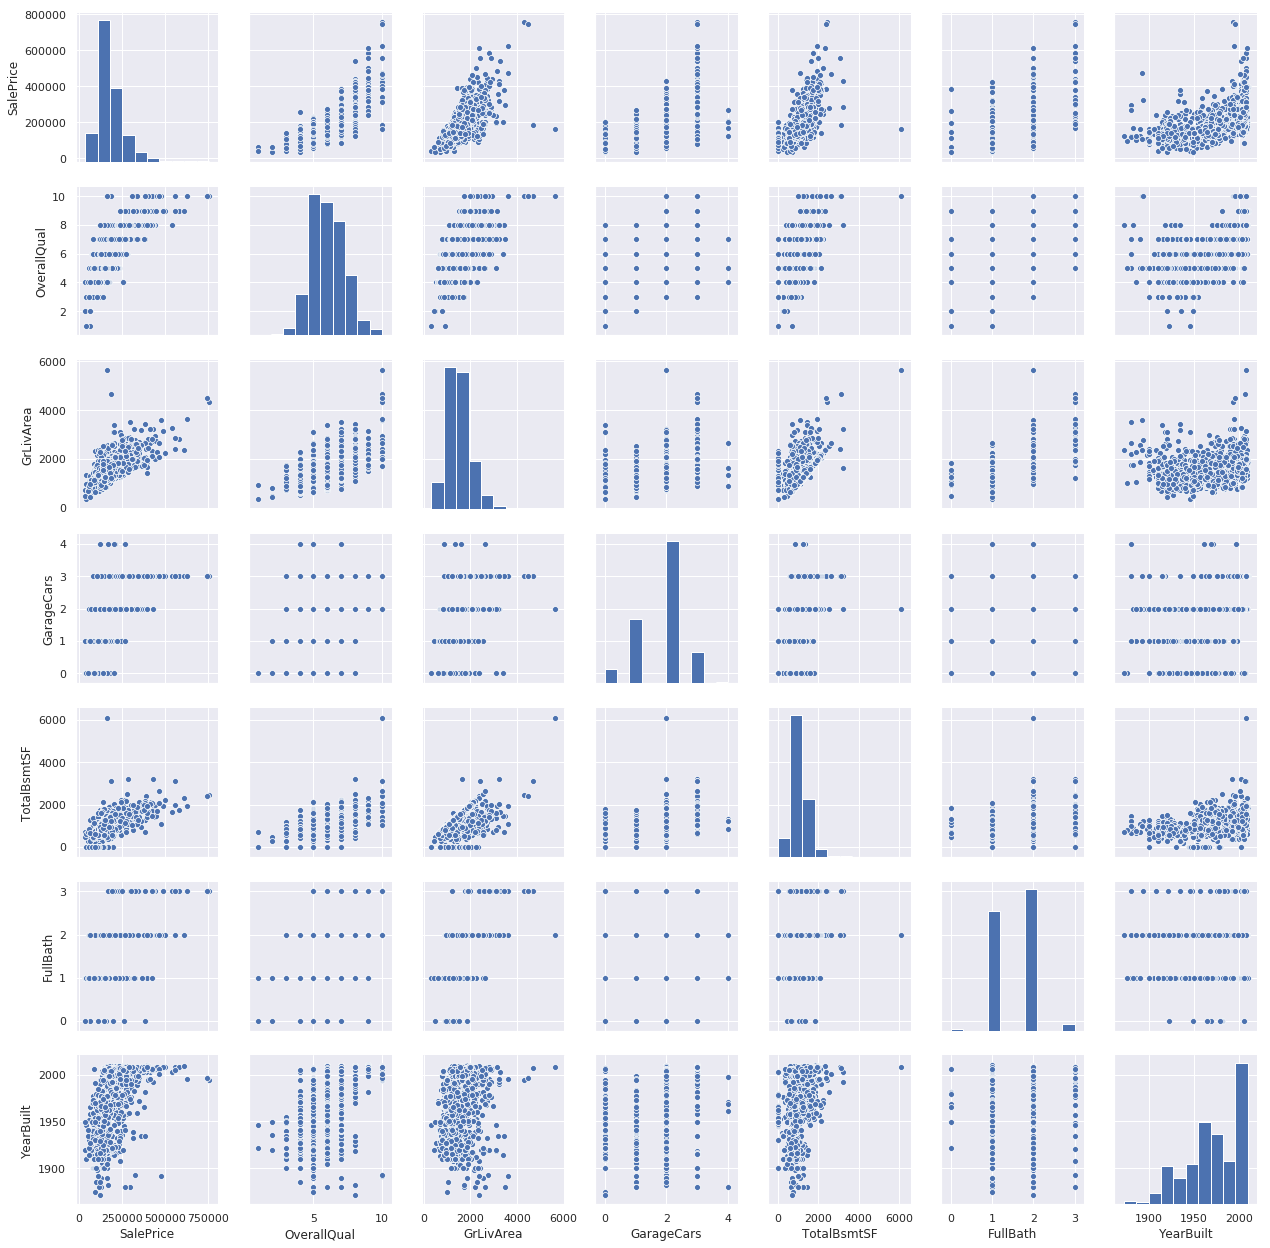

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_d[cols], size = 2.5)
plt.show();


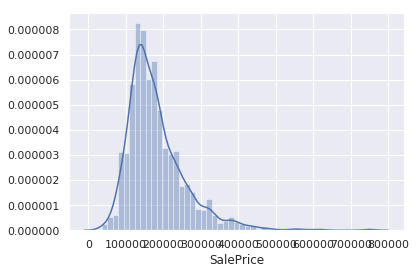

In [16]:
sns.distplot(train_d["SalePrice"])

In [17]:
#train_d["SalePrice"]=np.log1p(train_d["SalePrice"])

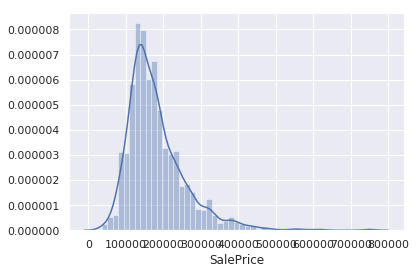

In [18]:
sns.distplot(train_d["SalePrice"])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

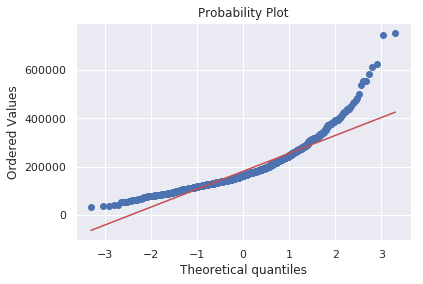

In [19]:
stats.probplot(train_d["SalePrice"],plot=plt)

In [20]:
train_d.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)
test_d.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [21]:
print(train_d["SalePrice"].skew())
print(train_d["SalePrice"].kurt())

1.8828757597682129
6.536281860064529


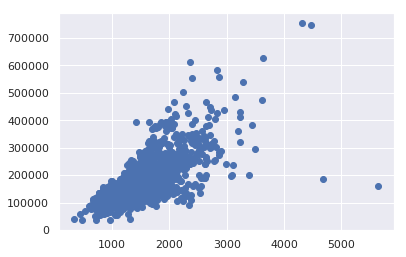

In [22]:
plt.scatter(train_d["GrLivArea"],train_d["SalePrice"])

In [23]:
train_d["GrLivArea"].sort_values(ascending=False)[:4]

1298    5642
523     4676
1182    4476
691     4316
Name: GrLivArea, dtype: int64

In [24]:
train_d.drop(train_d[train_d["Id"]==4316].index,inplace=True)

In [25]:
train_d.drop(train_d[train_d["Id"]==691].index,inplace=True)

In [26]:
train_d.shape

(1459, 76)

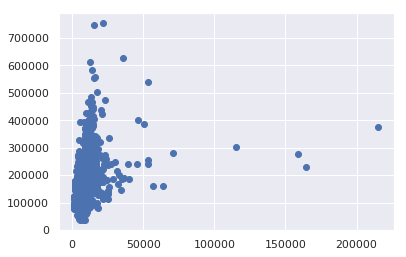

In [27]:
plt.scatter(train_d["LotArea"],train_d["SalePrice"])

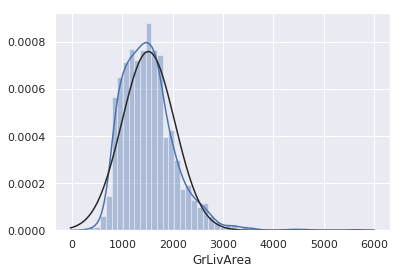

In [28]:
sns.distplot(train_d['GrLivArea'],fit=norm);

In [29]:
train_d["GrLivArea"]=np.log1p(train_d["GrLivArea"])

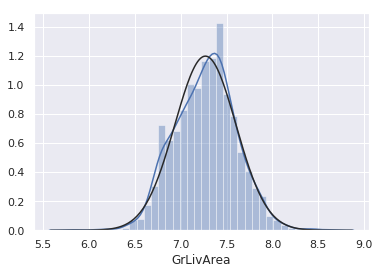

In [30]:
sns.distplot(train_d['GrLivArea'],fit=norm);

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([5.81413053, 6.08449941, 6.17586727, ..., 8.40670846, 8.45041216,
         8.63817112])),
 (0.3329347801625755, 7.268871220883234, 0.9977511845378293))

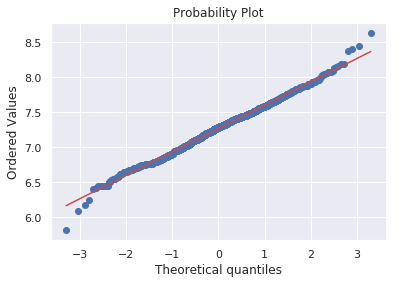

In [31]:
stats.probplot(train_d['GrLivArea'],plot=plt)

In [32]:
BsmtUnfSF 	TotalBsmtSF

SyntaxError: invalid syntax (<ipython-input-32-487a846eb6de>, line 1)

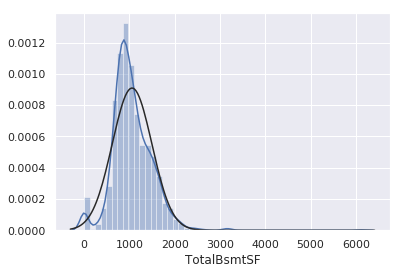

In [33]:
sns.distplot(train_d["TotalBsmtSF"],fit=norm)

In [34]:

#train_d[train_d["TotalBsmtSF"]>0]= np.log(train_d[train_d["TotalBsmtSF"]>0])

In [35]:
#train_d["TotalBsmtSF"].unique()

In [36]:
train_d["LotFrontage"] = train_d.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

test_d["LotFrontage"] = test_d.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


In [37]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_d[col] = train_d[col].fillna('None')
    
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_d[col] = test_d[col].fillna('None')

In [38]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_d[col] = train_d[col].fillna(0)

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test_d[col] = test_d[col].fillna(0)

In [39]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_d[col] = train_d[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test_d[col] = test_d[col].fillna(0)

In [40]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_d[col] = train_d[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test_d[col] = test_d[col].fillna('None')

In [41]:
train_d["MasVnrType"] = train_d["MasVnrType"].fillna("None")
train_d["MasVnrArea"] = train_d["MasVnrArea"].fillna(0)

test_d["MasVnrType"] = test_d["MasVnrType"].fillna("None")
test_d["MasVnrArea"] = test_d["MasVnrArea"].fillna(0)

In [42]:
train_d['MSZoning'] = train_d['MSZoning'].fillna(train_d['MSZoning'].mode()[0])
test_d['MSZoning'] = test_d['MSZoning'].fillna(test_d['MSZoning'].mode()[0])

In [43]:
train_d =train_d.drop(['Utilities'], axis=1)

test_d =test_d.drop(['Utilities'], axis=1)

In [44]:
train_d["Functional"] = train_d["Functional"].fillna("Typ")

test_d["Functional"] = test_d["Functional"].fillna("Typ")

In [45]:
train_d['Electrical'] = train_d['Electrical'].fillna(train_d['Electrical'].mode()[0])

test_d['Electrical'] = test_d['Electrical'].fillna(test_d['Electrical'].mode()[0])

In [46]:
train_d['KitchenQual'] = train_d['KitchenQual'].fillna(train_d['KitchenQual'].mode()[0])

test_d['KitchenQual'] = test_d['KitchenQual'].fillna(test_d['KitchenQual'].mode()[0])

In [47]:
train_d['Exterior1st'] = train_d['Exterior1st'].fillna(train_d['Exterior1st'].mode()[0])
train_d['Exterior2nd'] = train_d['Exterior2nd'].fillna(train_d['Exterior2nd'].mode()[0])

test_d['Exterior1st'] = test_d['Exterior1st'].fillna(test_d['Exterior1st'].mode()[0])
test_d['Exterior2nd'] = test_d['Exterior2nd'].fillna(test_d['Exterior2nd'].mode()[0])

In [48]:
train_d['SaleType'] = train_d['SaleType'].fillna(train_d['SaleType'].mode()[0])

test_d['SaleType'] = test_d['SaleType'].fillna(test_d['SaleType'].mode()[0])

In [49]:
train_d['MSSubClass'] = train_d['MSSubClass'].fillna("None")


test_d['MSSubClass'] = test_d['MSSubClass'].fillna("None")



In [50]:
#test_d.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [51]:
train_d.drop(["Id"],axis=1,inplace=True)

In [52]:
test_d.drop(["Id"],axis=1,inplace=True)

In [53]:
 per=(train_d.isnull().sum()*100/len(train_d)).sort_values(ascending=False)

In [54]:
y_train=train_d["SalePrice"]

In [55]:
print(test_d.shape)
print(train_d.shape)

(1459, 73)
(1459, 74)


In [56]:
train=train_d.drop(["SalePrice"],axis=1)
train_objs_num = len(train)
dataset = pd.concat(objs=[train, test_d], axis=0)
dataset = pd.get_dummies(dataset)
train = copy.copy(dataset[:train_objs_num])
test = copy.copy(dataset[train_objs_num:])

In [57]:
print(train.shape)
print(test.shape)

(1459, 277)
(1459, 277)


In [58]:
test_d.shape

(1459, 73)

In [59]:
 per=(test_d.isnull().sum()*100/len(test_d)).sort_values(ascending=False)

In [60]:
per.head()


SaleCondition    0.0
TotalBsmtSF      0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
dtype: float64

In [61]:
train_d.shape

(1459, 74)

In [62]:
test_d.shape

(1459, 73)

In [63]:
X_train=train_d.drop(["SalePrice"],axis=1)

In [64]:
X_train.shape

(1459, 73)

In [65]:
#GardientBoosting
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
gbr_model.score(train,y_train)

0.9982419995631601

In [67]:
y_pred=gbr_model.predict(test)

In [68]:
my_submission = pd.DataFrame({"Id":id1,"SalePrice": y_pred})
print(my_submission)

my_submission.to_csv('submission11.csv', encoding='utf-8', index=False)

        Id      SalePrice
0     1461  161960.334958
1     1462  214478.003922
2     1463  221382.576287
3     1464  238226.854642
4     1465  263891.376733
5     1466  220585.388102
6     1467  225876.549995
7     1468  214537.248385
8     1469  263194.524266
9     1470  156398.077280
10    1471  298926.610751
11    1472  136557.186094
12    1473  132815.347851
13    1474  186582.618564
14    1475  197628.290315
15    1476  432258.485065
16    1477  404001.951327
17    1478  416460.641832
18    1479  420704.957143
19    1480  425470.303028
20    1481  421054.887994
21    1482  311250.938970
22    1483  239340.693148
23    1484  256335.686751
24    1485  255064.018345
25    1486  252830.546780
26    1487  424566.163793
27    1488  380957.332428
28    1489  329003.900839
29    1490  254863.071708
...    ...            ...
1429  2890  121403.688937
1430  2891  165142.926000
1431  2892   96089.550228
1432  2893  116630.017781
1433  2894   90198.038230
1434  2895  340819.936350
1435  2896  